In [1]:
# load the packages
import xarray as xr
import pandas as pd
import numpy  as np
from datetime import date
from datetime import datetime
import os
import shutil
import glob
#import datetime #import date
import matplotlib.pyplot  as plt
import matplotlib as mpl
#from ipynb.fs.full.Untitled2 import save_netcdf
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 24}
# matplotlib.rcs('font', **font)
plt.rc('font', **font)
import random
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


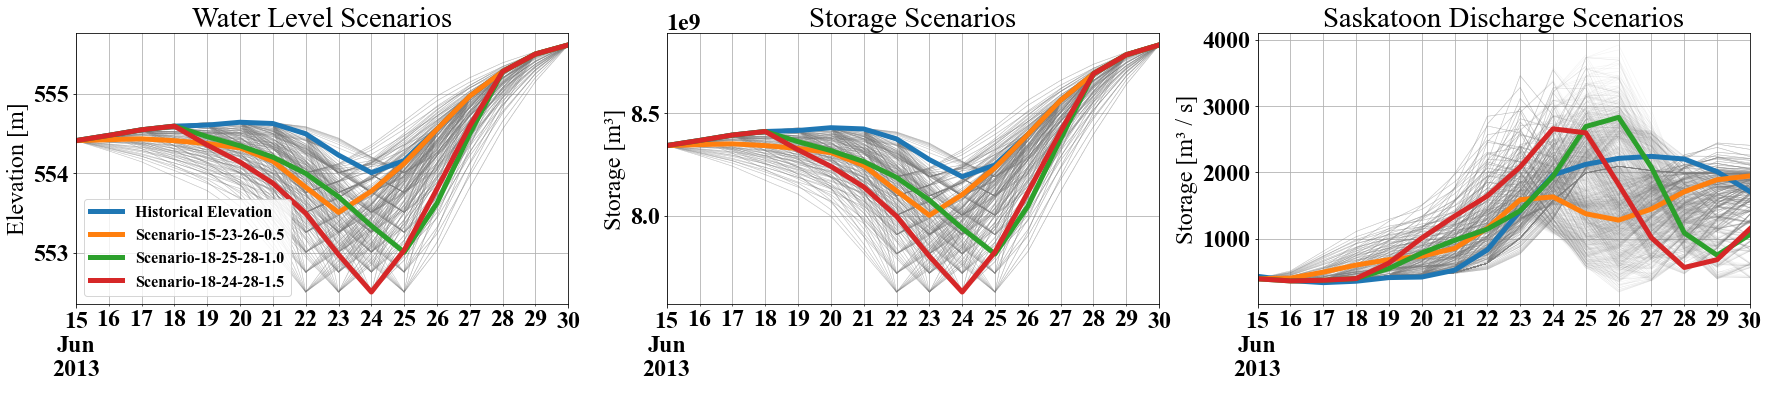

In [6]:
# Create the figure and gridspec
fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

# Create the subplots using gridspec
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

# parameters
linewidth = 5

#########
### Water Level Scenarios
#########
# Read the data for elevation of the lake Diefenbaker
elevation_ens = pd.read_csv('../data/ensemble/Level_ensemble_Scenarios.csv')
elevation_ens ['DATE'] = pd.to_datetime(elevation_ens ['DATE'])
elevation_ens.set_index('DATE', inplace=True)
elevation_ens = elevation_ens ['2013-06-15':'2013-06-30']

# Create the plot
elevation_ens.plot(ax =ax1, label = '_nolegend_', linewidth=linewidth/10, c='grey', alpha=0.1)
l1 = ax1.plot(elevation_ens['05HF003'], label = 'Historical Elevation', linewidth=linewidth)
l2 = ax1.plot(elevation_ens['scenario_15_23_26_0.5'], label = 'Scenario-15-23-26-0.5', linewidth=linewidth)
l3 = ax1.plot(elevation_ens['scenario_18_25_28_1.0'], label = 'Scenario-18-25-28-1.0', linewidth=linewidth)
l4 = ax1.plot(elevation_ens['scenario_18_24_28_1.5'], label = 'Scenario-18-24-28-1.5', linewidth=linewidth)

# Create the plot
ax1.set_title('Water Level Scenarios')

# Add tickes
ax1.set_xlabel('   ')
ax1.set_ylabel('Elevation [m]')

# 
ax1.grid(True, which='both', axis='both')

# 
ax1.legend(handles=[l1[0], l2[0], l3[0], l4[0]], loc = 'lower left', fontsize = '16')


#########
### Water Storage Scenarios
#########
# Read the data for elevation of the lake Diefenbaker
storage_ens = pd.read_csv('../data/ensemble/Storage_ensemble_Scenarios.csv')
storage_ens ['DATE'] = pd.to_datetime(storage_ens ['DATE'])
storage_ens.set_index('DATE', inplace=True)
storage_ens = storage_ens ['2013-06-15':'2013-06-30']

# Create the plot
storage_ens.plot(ax =ax2, label = '_nolegend_', linewidth=linewidth/10, c='grey', alpha=0.1)
l1 = ax2.plot(storage_ens['05HF003'], label = 'Historical Storage', linewidth=linewidth)
l2 = ax2.plot(storage_ens['scenario_15_23_26_0.5'], label = 'Scenario-15-23-26-0.5', linewidth=linewidth)
l3 = ax2.plot(storage_ens['scenario_18_25_28_1.0'], label = 'Scenario-18-25-28-1.0', linewidth=linewidth)
l4 = ax2.plot(storage_ens['scenario_18_24_28_1.5'], label = 'Scenario-18-24-28-1.5', linewidth=linewidth)

# Create the plot
ax2.set_title('Storage Scenarios')

# Add tickes
ax2.set_xlabel('   ')
ax2.set_ylabel('Storage [m\u00b3]')

# 
ax2.grid(True, which='both', axis='both')

# 
#ax2.legend(handles=[l1[0], l2[0], l3[0], l4[0]], loc = 'lower left', fontsize = '16')
ax2.legend().remove()


#########
### Discharge at Saskatoon
#########
# Read the data for elevation of the lake Diefenbaker
discharge_ens = pd.read_csv('../data/ensemble/scenarios_of_river_flow_at_Saskatoon.csv')
discharge_ens = discharge_ens.drop(columns=['Unnamed: 0'])
discharge_ens ['DATE'] = pd.to_datetime(discharge_ens ['DATE'])
discharge_ens.set_index('DATE', inplace=True)
discharge_ens = discharge_ens ['2013-06-15':'2013-06-30']
#
discharge_obs = pd.read_csv('../data/HYDAT/05HG001_flow.csv')
discharge_obs ['DATE'] = pd.to_datetime(discharge_obs ['DATE'])
discharge_obs.set_index('DATE', inplace=True)
discharge_obs = discharge_obs ['2013-06-15':'2013-06-30']


# Create the plot
discharge_ens.plot(ax =ax3, label = '_nolegend_', linewidth=linewidth/10, c='grey', alpha=0.1)
l1 = ax3.plot(discharge_obs, label = 'Historical Storage', linewidth=linewidth)
l2 = ax3.plot(discharge_ens['./output/scenario_15_23_26_0.5'], label = 'Scenario-15-23-26-0.5', linewidth=linewidth)
l3 = ax3.plot(discharge_ens['./output/scenario_18_25_28_1.0'], label = 'Scenario-18-25-28-1.0', linewidth=linewidth)
l4 = ax3.plot(discharge_ens['./output/scenario_18_24_28_1.5'], label = 'Scenario-18-24-28-1.5', linewidth=linewidth)

# Create the plot
ax3.set_title('Saskatoon Discharge Scenarios')

# Add tickes
ax3.set_xlabel('   ')
ax3.set_ylabel('Storage [m\u00b3 / s]')

# 
ax3.grid(True, which='both', axis='both')

# 
#ax3.legend(handles=[l1[0], l2[0], l3[0], l4[0]], loc = 'lower left', fontsize = '16')
ax3.legend().remove()

plt.show()
